In [25]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in CSV format)
# Replace 'your_dataset.csv' with the actual path if saved as a CSV
data = pd.read_csv("/content/Series.csv")

In [27]:
#Basic inspection of the data
print("First few rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary statistics for numerical columns:")
print(data.describe())

First few rows of the dataset:
          id             title                  genres  averageRating  \
0  tt0903747      Breaking Bad  Crime, Drama, Thriller            9.5   
1  tt5491994   Planet Earth II             Documentary            9.5   
2  tt0185906  Band of Brothers     Drama, History, War            9.4   
3  tt0795176      Planet Earth     Documentary, Family            9.4   
4  tt5152226      Tree of Life                   Drama            9.4   

   numVotes  releaseYear  
0   2222284         2008  
1    161331         2016  
2    543090         2001  
3    222856         2006  
4     11606         2014  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1

In [28]:
# 2. Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64


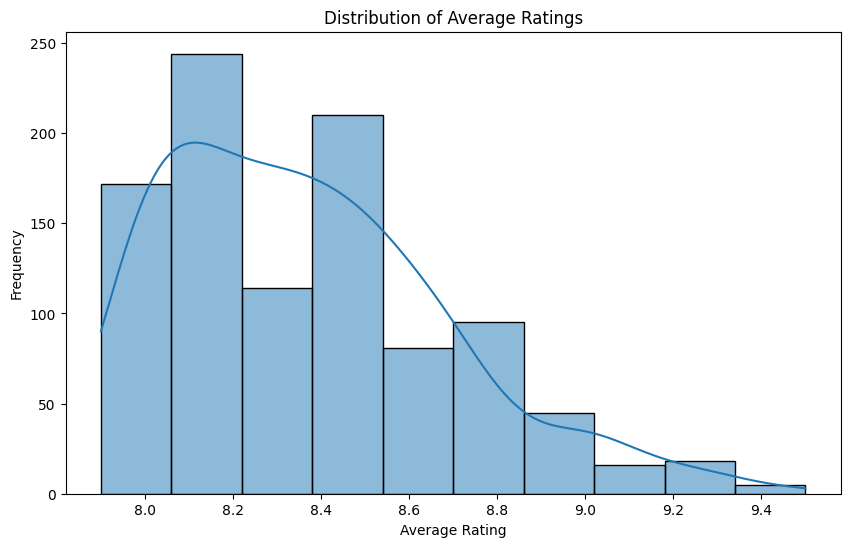

In [29]:
# 3. Distribution of 'averageRating'
plt.figure(figsize=(10, 6))
sns.histplot(data['averageRating'], kde=True, bins=10)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

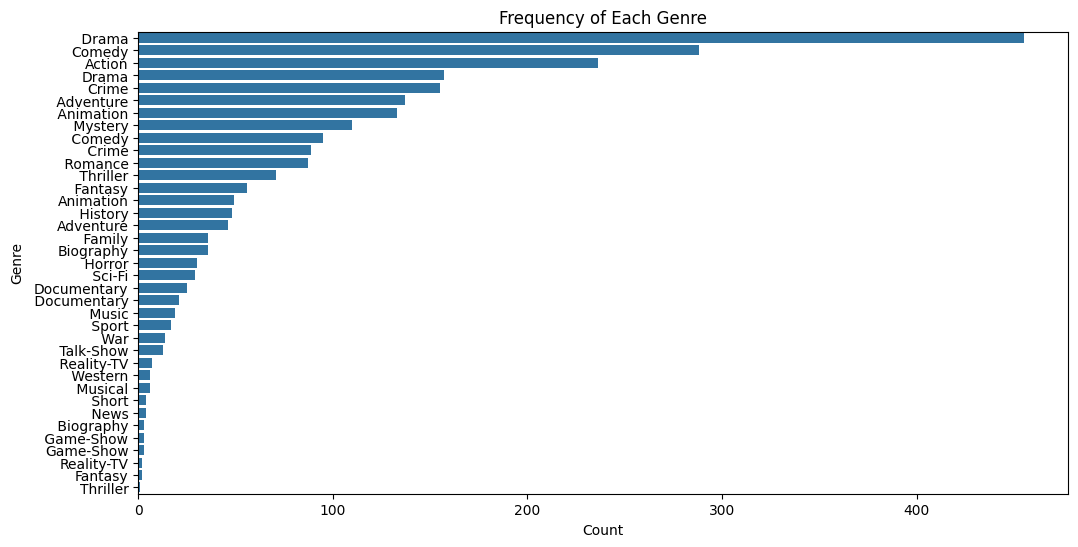

In [51]:
# Splitting genres and counting unique occurrences
genres = data['genres'].str.split(',').explode()

# Plotting genre frequency
plt.figure(figsize=(12, 6))
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Frequency of Each Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


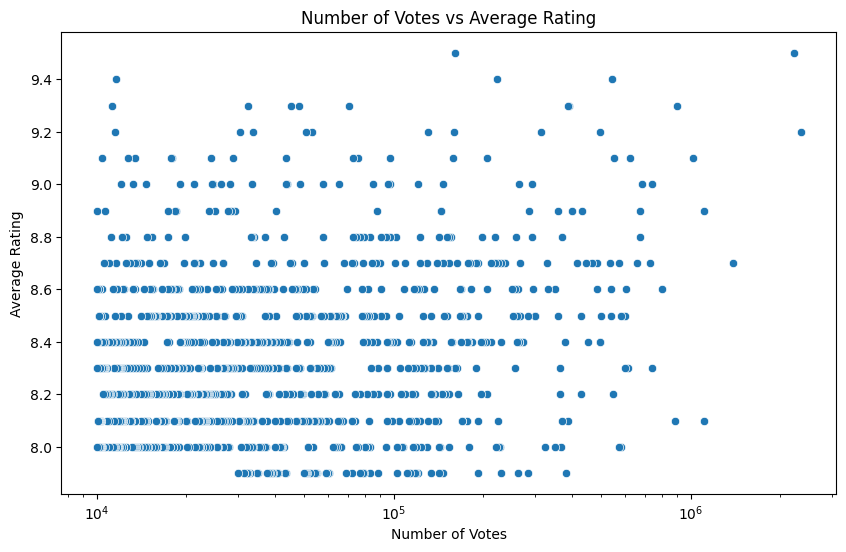

In [39]:
# 5. Analyzing ratings vs. votes relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numVotes', y='averageRating', data=data)
plt.title('Number of Votes vs Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.xscale('log')  # Using log scale for better visualization
plt.show()

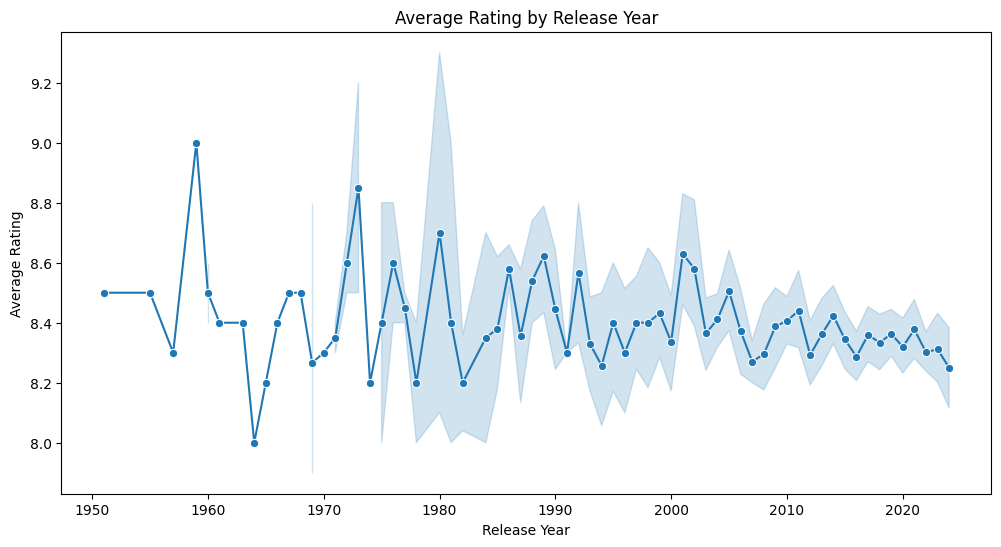

In [40]:
# 6. Average rating by release year
plt.figure(figsize=(12, 6))
sns.lineplot(x='releaseYear', y='averageRating', data=data, marker='o')
plt.title('Average Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()


In [41]:
# Top-rated titles by genre
top_genres = data.groupby('genres')['averageRating'].max().sort_values(ascending=False)
print("\nTop-rated titles by genre:")
print(top_genres)


Top-rated titles by genre:
genres
Documentary                    9.5
Crime, Drama, Thriller         9.5
Drama                          9.4
Documentary, Family            9.4
Drama, History, War            9.4
                              ... 
Crime, Documentary, Mystery    8.0
Crime, Thriller                8.0
Action                         8.0
Adventure, Drama, Horror       7.9
Adventure, Biography, Drama    7.9
Name: averageRating, Length: 186, dtype: float64



Correlation matrix:
               averageRating  numVotes  releaseYear
averageRating       1.000000  0.260295    -0.108810
numVotes            0.260295  1.000000     0.024984
releaseYear        -0.108810  0.024984     1.000000


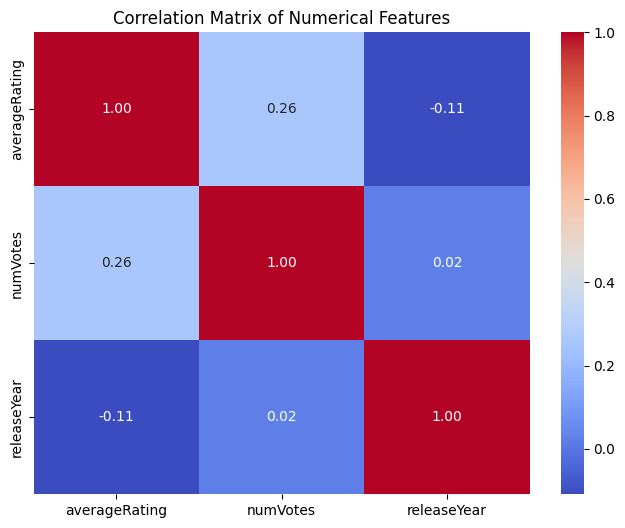

In [42]:
# 8. Correlation analysis
# Calculate correlation matrix for numerical columns
correlation_matrix = data[['averageRating', 'numVotes', 'releaseYear']].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()
